<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [12]:
import pandas as pd
import numpy as np
import gensim
import os
import re

from spacy.tokenizer import Tokenizer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd
yelp = pd.read_json('./data/review_sample.json', lines=True)

In [13]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [14]:
from spacy.tokenizer import Tokenizer

STOPWORDS = set(STOPWORDS).union(set(['here', 'went', 'came', 'been', 'review']))

def tokenize(doc):
    return [token for token in simple_preprocess(doc) if token not in STOPWORDS]


In [15]:
yelp['tokens'] = yelp['text'].apply(tokenize)

In [16]:
len(yelp['tokens'])

10000

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

text = list(yelp.text)
vect = CountVectorizer()
vect.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [18]:
# Get Word Counts for each document
dtm = pd.DataFrame(vect.transform(text).todense(), columns=vect.get_feature_names())
dtm.head(5)

,00,000,001695,007,00a,00am,00ish,00pm,01,011802,...,誰も乗車しなくても,豆腐花,質問にも丁寧に答えてくれましたし,車好きさんには,這是一個不錯的選擇,運転しない,運転中も英語で指導があります,食べ物はうまい,餐後點了甜點,３時間後の便
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/Users/michelle/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


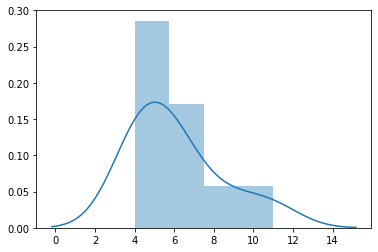

In [19]:
doc_len = [len(doc) for doc in yelp]

#lets see a graph of this matrix
#good that the word counts frequency peek around 6, its the right shape graph

import seaborn as sns

sns.distplot(doc_len);

In [20]:
#get feature matrix using vectors
text = list(yelp.text)

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(text)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,00,000,001695,007,00a,00am,00ish,00pm,01,011802,...,誰も乗車しなくても,豆腐花,質問にも丁寧に答えてくれましたし,車好きさんには,這是一個不錯的選擇,運転しない,運転中も英語で指導があります,食べ物はうまい,餐後點了甜點,３時間後の便
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#long text
#print(vect.get_feature_names())

In [22]:
#use nn to fit on dtm
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [23]:
 # Query Using kneighbors 
nn.kneighbors([dtm.iloc[336]])

(array([[0.        , 1.29553936, 1.29718442, 1.31183842, 1.31379732]]),
 array([[ 336,  793, 8151, 2337, 4151]]))

In [24]:
# Query for similarities of Random rev to Yelp
rndm_rev = [ """
I came here with a party of 3 on a regular weekday at 6:30PM. We were seated immediately, but the restaurant started to get packed shortly. APPEARANCE & SEATING: I love how the front of the restaurant is an open window/wall, so the restaurant doesn't get too stuffy
"""]
new = tfidf.transform(rndm_rev)

In [25]:
nn.kneighbors(new.todense())

(array([[1.27461474, 1.28178704, 1.29819903, 1.30014686, 1.30368051]]),
 array([[8050, 1773, 5652, 1322, 8811]]))

In [26]:
yelp.text[8050]

'I have been here twice before and service was terrible.  Waiting for a table for 30 mins or longer when tables were open, was unacceptable!  People who arrived after us were seated before us, same seating preference and number in party.  \nYesterday, their service was awesome!  For a party of 7, we were seated immediately with no hassle.  Our server was Tony and he made the evening enjoyable.  He was very attentive and personable.  With the crew yesterday, I would gladly return to this location.'

In [27]:
print(yelp.text[1773])
print(yelp.text[5652])
print(yelp.text[1322])
print(yelp.text[8811])

We were passing by town. & this restaurant came across. We were looking for a good & local restaurant. We didn't get disappointed. Best nacho i've ever had.
First time here. Cute little restaurant that smells really good when you walk in.   Clean in appearance. Tonight at 6pm there is only one waitress who is serving inside and outside.  She is also handling the take out orders.  She is attentive when you flag her down. The food was outstanding  and my portion was so big I  had to take some home.  I don't want  to say this restaurant was wonderful, because I'm afraid I won't be able to get a table next time we come back, but it was.  Only 4 stars because  they do need more wait staff.
Great little Mexican place, best for take out.

Can't wait until they open the larger restaurant downtown.
Personally I think this is one of the best take out Chinese restaurant in city. I've been going to this restaurant since I was little late 90's since then the food tasted better and quality of food i

In [28]:
# Calculate Distance of TF-IDF Vectors
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix  = cosine_similarity(dtm)
df = pd.DataFrame(dist_matrix)

In [29]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.000000,0.000000,0.011914,0.000000,0.000000,0.023318,0.002262,0.003975,0.001873,0.028459,...,0.000000,0.000000,0.000000,0.008884,0.014684,0.042875,0.000000,0.000000,0.000000,0.034125
1,0.000000,1.000000,0.015051,0.000000,0.055804,0.053295,0.000000,0.020167,0.004505,0.009144,...,0.032563,0.019836,0.000000,0.000000,0.011554,0.000000,0.023795,0.000000,0.000000,0.006531
2,0.011914,0.015051,1.000000,0.022372,0.000000,0.013487,0.022559,0.014843,0.023348,0.055829,...,0.010684,0.025304,0.000000,0.022487,0.017014,0.031043,0.000000,0.000000,0.011111,0.090149
3,0.000000,0.000000,0.022372,1.000000,0.000000,0.055302,0.018994,0.015863,0.006302,0.000000,...,0.015288,0.000000,0.005109,0.006793,0.000000,0.013940,0.000000,0.023541,0.000000,0.073619
4,0.000000,0.055804,0.000000,0.000000,1.000000,0.054491,0.000000,0.030375,0.002000,0.048990,...,0.019551,0.000000,0.023419,0.000000,0.087087,0.018783,0.016727,0.033698,0.028347,0.049373


In [30]:
# Grab the row
df[df[0] < 1][0].sort_values(ascending=False)[:10]

2131    0.177647
6019    0.159861
3276    0.154192
8470    0.148282
2943    0.140329
9036    0.138304
2621    0.130106
3714    0.126975
2207    0.115362
2865    0.110957
Name: 0, dtype: float64

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [31]:
# Create Pipeline Components

vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
rfc = RandomForestClassifier()


# Define the Pipeline

pipe = Pipeline([('vect', vect), ('clf', rfc)])

In [32]:

parameters = {
    'vect__max_df': ( 0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (500,1000),
    'clf__n_estimators':(25, 30),
    'clf__max_depth':(15, 20)
}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(yelp.text, yelp.stars)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  6.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vect__max_df': (0.75, 1.0), 'vect__min_df': (0.02, 0.05), 'vect__max_features': (500, 1000), 'clf__n_estimators': (25, 30), 'clf__max_depth': (15, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [33]:
grid_search.best_score_

0.5512

In [47]:
#first run was: 0.5467 with the basic param, run time 7.6 mins
#second run was:  0.5509 with tuning clf__n_estimators':(25, 30), clf__max_depth':(15, 20), run time 6.4 mis

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [35]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

Learn the vocubalary of the yelp data:

In [36]:
#id2word = ...
# A Dictionary Representation of all the words in our corpus
id2word = corpora.Dictionary(yelp['text'].apply(tokenize))

In [37]:
import sys
sys.getsizeof(id2word)

56

Create a bag of words representation of the entire corpus

In [38]:
#corpus = ...
# a bag of words(bow) representation of our corpus
# Note: we haven't actually read any text into memory here
corpus = [id2word.doc2bow(text) for text in yelp['text'].apply(tokenize)]

Your LDA model should be ready for estimation: 

In [39]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 5 # You can change this parameter
                  )

Create 1-2 visualizations of the results

In [40]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [41]:
topics = [' '.join(t[0:5]) for t in words]

In [42]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
place food time good like

------ Topic 1 ------
great food time service place

------ Topic 2 ------
food good great service place

------ Topic 3 ------
good place great food time

------ Topic 4 ------
place food good like service



In [43]:
#Topic Distance Visualization

import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [44]:
#this may take a while--note to self
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Users/michelle/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.005723 -0.000334       1        1  20.823475
3     -0.000775  0.004948       2        1  19.850107
1     -0.003497 -0.003043       3        1  19.825617
2      0.000846 -0.002707       4        1  19.809280
0     -0.002297  0.001136       5        1  19.691523, topic_info=     Category         Freq        Term        Total  loglift  logprob
44    Default  3487.000000     service  3487.000000  30.0000  30.0000
39    Default  4447.000000        good  4447.000000  29.0000  29.0000
18    Default  3312.000000        like  3312.000000  28.0000  28.0000
131   Default  4549.000000       place  4549.000000  27.0000  27.0000
206   Default  4123.000000       great  4123.000000  26.0000  26.0000
114   Default  1857.000000          ve  1857.000000  25.0000  25.0000
142   Default  4743.000000        food  4743.000000  24.0000  24.0000
74    Default  1994.000000         got  1994.000000  23.0000  23.0000
1274  Default  1347.000000     chicken  1347.000000  22.0000  22.0000
155   Default   870.000000       price   870.000000  21.0000  21.0000
120   Default  1744.000000        best  1744.000000  20.0000  20.0000
45    Default  1507.000000       staff  1507.000000  19.0000  19.0000
36    Default   944.000000        wait   944.000000  18.0000  18.0000
30    Default  1162.000000        said  1162.000000  17.0000  17.0000
732   Default  1587.000000        love  1587.000000  16.0000  16.0000
205   Default  1111.000000       going  1111.000000  15.0000  15.0000
133   Default   780.000000       table   780.000000  14.0000  14.0000
134   Default   800.000000         bad   800.000000  13.0000  13.0000
648   Default  1331.000000  restaurant  1331.000000  12.0000  12.0000
676   Default   642.000000   excellent   642.000000  11.0000  11.0000
162   Default   598.000000       stars   598.000000  10.0000  10.0000
392   Default   761.000000       pizza   761.000000   9.0000   9.0000
796   Default   546.000000     friends   546.000000   8.0000   8.0000
369   Default   906.000000       fresh   906.000000   7.0000   7.0000
35    Default   364.000000      trying   364.000000   6.0000   6.0000
1003  Default   675.000000     looking   675.000000   5.0000   5.0000
236   Default   610.000000        away   610.000000   4.0000   4.0000
700   Default   470.000000       money   470.000000   3.0000   3.0000
129   Default  1381.000000      people  1381.000000   2.0000   2.0000
401   Default   657.000000      server   657.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
30     Topic5   274.187378        said  1162.319458   0.1806  -5.8365
339    Topic5   158.106171         big   630.641113   0.2415  -6.3870
74     Topic5   442.269653         got  1994.344360   0.1188  -5.3584
933    Topic5   171.977585       clean   698.649963   0.2232  -6.3029
754    Topic5   135.855331      things   538.439148   0.2479  -6.5387
207    Topic5    99.102982        hair   383.309998   0.2723  -6.8541
241    Topic5   139.250992        meat   564.613953   0.2251  -6.5140
860    Topic5    80.590904       makes   303.485352   0.2990  -7.0609
38     Topic5   295.169281    friendly  1334.708862   0.1161  -5.7627
311    Topic5   227.024246        want   994.998901   0.1473  -6.0252
349    Topic5   302.886322        come  1403.604126   0.0915  -5.7369
142    Topic5   856.401794        food  4743.991211  -0.0869  -4.6975
91     Topic5   354.631592        nice  1690.570312   0.0632  -5.5792
190    Topic5   286.316681     amazing  1316.127686   0.0996  -5.7932
182    Topic5   249.010040   recommend  1123.067261   0.1187  -5.9328
385    Topic5   306.429199       order  1449.638794   0.0709  -5.7253
115    Topic5   199.785782       vegas   879.746216   0.1426  -6.1530
18     Topic5   573.720215        like  3312.174805  -0.1282  -5.0981
39     Topic5   701.406616        good  4447.162598  -0.2220  -4.8972
356    To

## A few words about the above visual
Above you can see that there are descrete topics
The slider allows us to rank them according to relevance with .6 being optimal.
Each circle is a topic and the distance between the topics is computed using Jensen-Shannon Divergence
This is a glabal view of topics and how they are different from one another.
Place, food, and good come up the most as well as great and like

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)

In [45]:
distro = [lda[d] for d in corpus]

In [46]:
distro = [lda[d] for d in corpus]

def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]